# Chapter 3 Exercises

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
from theano import shared, tensor

np.random.seed(seed=0)

In [2]:
az.style.use('arviz-darkgrid')

## Question 6
***

In [3]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

In [4]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

In [5]:
%%time
with model_g:
    trace_nuts_non_centered = pm.sample(draws=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1232.62draws/s]
The acceptance probability does not match the target. It is 0.9010203771299029, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9011714775217043, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 1.49 s, sys: 124 ms, total: 1.61 s
Wall time: 4.84 s


In [6]:
nuts_non_centered_dataset = az.from_pymc3(trace=trace_nuts_non_centered)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa37f3da748>,
      dtype=object)

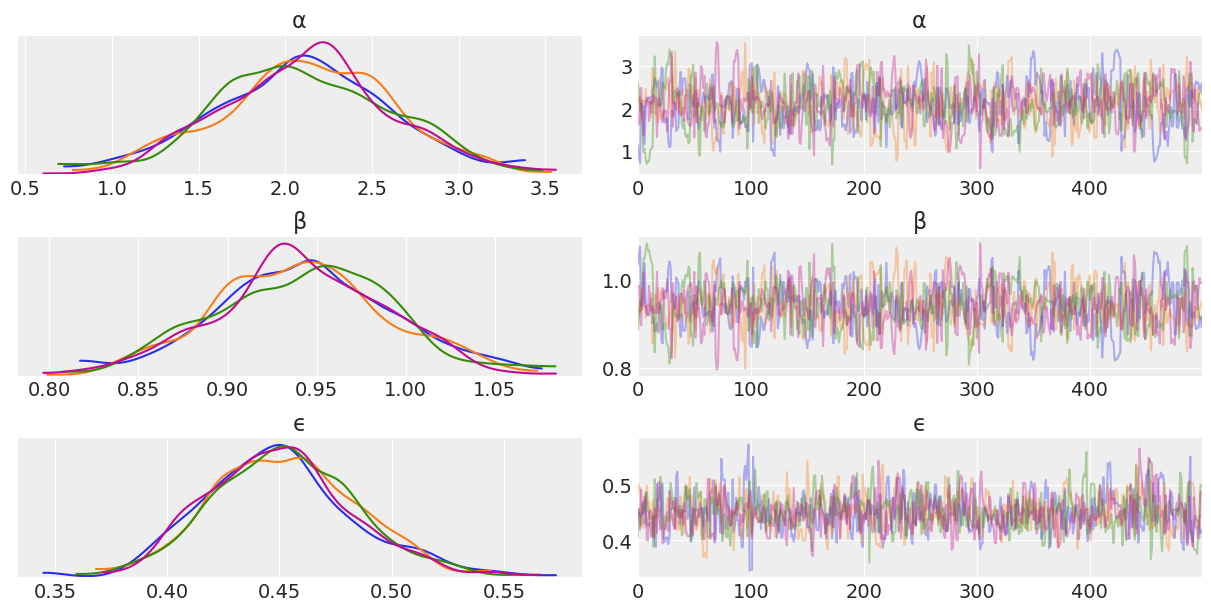

In [7]:
az.plot_trace(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36f4d3d30>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36f4d3d30>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36f4d3d30>,
       dtype=object)]

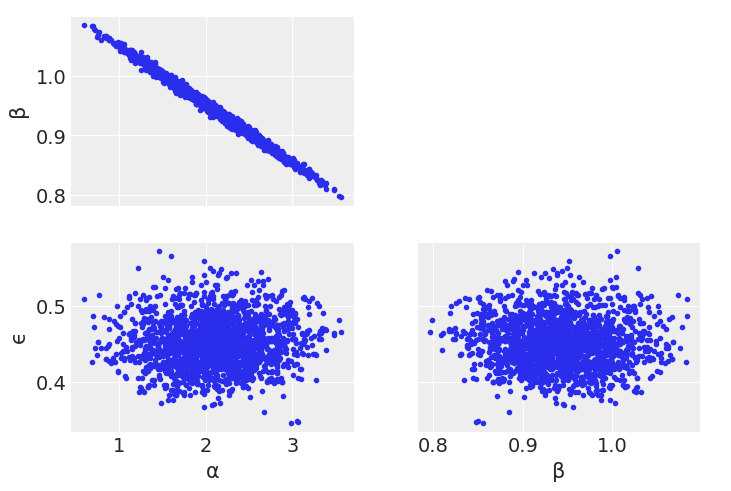

In [8]:
az.plot_pair(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

In [9]:
%%time
with model_g:
    step = pm.Metropolis()
    trace_mh_non_centered = pm.sample(draws=500, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 7926.33draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 1.02 s, sys: 62.6 ms, total: 1.09 s
Wall time: 1.19 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa37f63d940>,
      dtype=object)

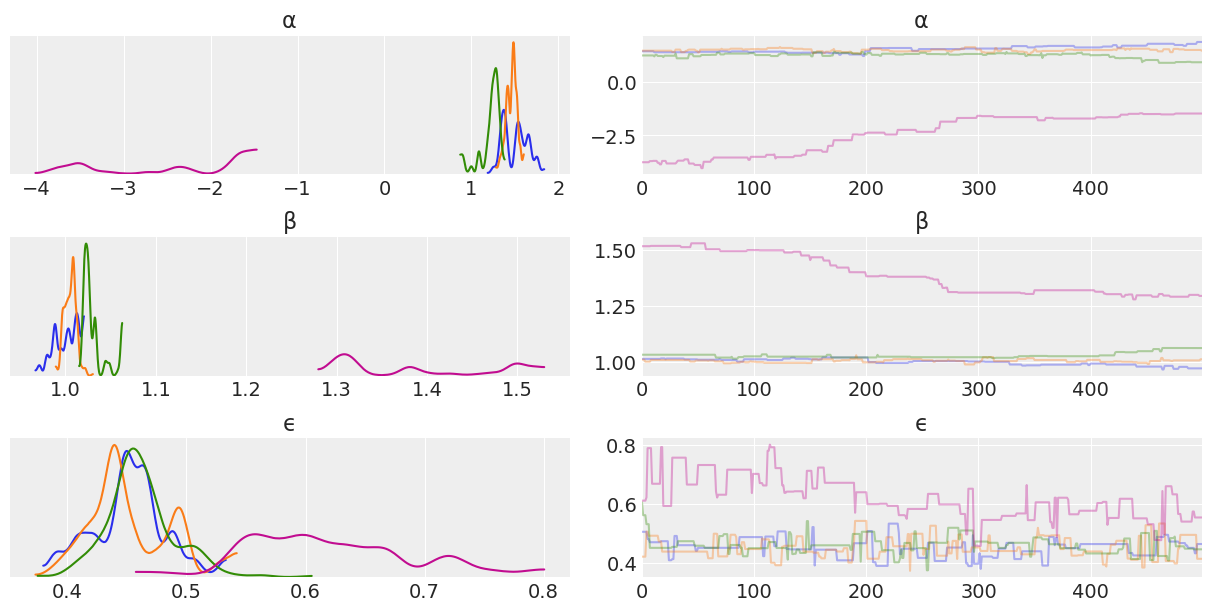

In [10]:
az.plot_trace(trace_mh_non_centered, var_names=['α', 'β', 'ϵ'])

In [11]:
az.summary(trace_nuts_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,2.10,0.50,0.01,1.18,3.06,538.0,1.0
β,0.94,0.05,0.00,0.85,1.03,545.0,1.0
ϵ,0.45,0.03,0.00,0.40,0.52,993.0,1.0


In [12]:
az.summary(trace_mh_non_centered, var_names=['α', 'β', 'ϵ'])

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
α,0.44,1.72,0.63,-3.52,1.66,2.0,4.44
β,1.11,0.17,0.06,0.98,1.50,2.0,4.39
ϵ,0.50,0.08,0.03,0.39,0.67,2.0,2.10


We'll standardize the variables and take samples again. We don't need to redefine the model but will do so for clarities sake

In [13]:
# or standardize the data
x_centered = (x - x.mean())/x.std()
y_centered = (y - y.mean())/y.std()

In [14]:
with pm.Model() as model_g_centered:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = pm.Deterministic('μ', α + β * x_centered)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_centered)

In [15]:
%%time
with model_g_centered:
    trace_nuts_centered = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 5027.36draws/s]
The acceptance probability does not match the target. It is 0.8818483963208862, but should be close to 0.8. Try to increase the number of tuning steps.


CPU times: user 1.11 s, sys: 85.1 ms, total: 1.19 s
Wall time: 1.45 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367d1b7b8>,
      dtype=object)

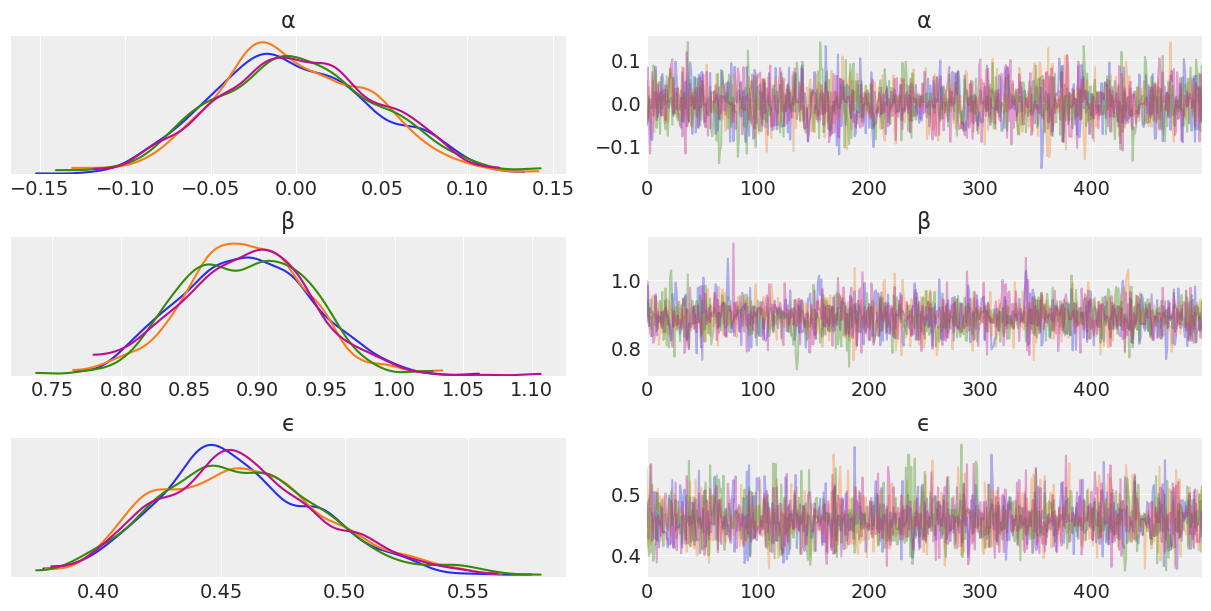

In [16]:
az.plot_trace(trace_nuts_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367867748>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367867748>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa367867748>,
       dtype=object)]

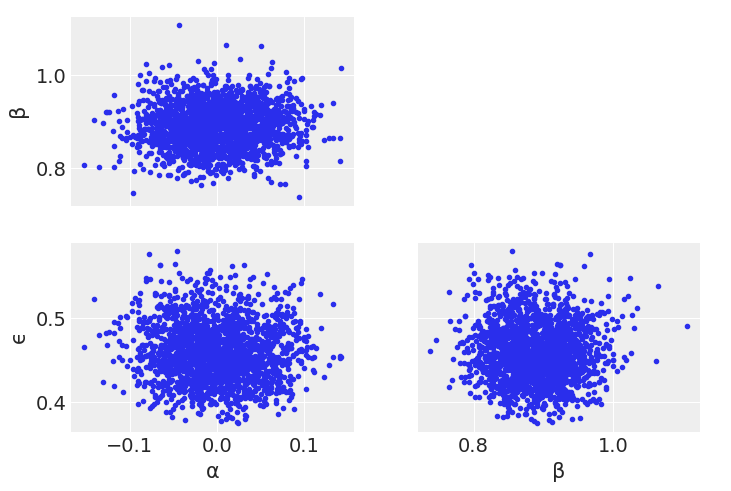

In [17]:
az.plot_pair(trace_nuts_centered, var_names=['α', 'β', 'ϵ'])

In [18]:
%%time
with model_g_centered:
    # step = pm.Metropolis(vars=["μ"])
    step = pm.Metropolis()
    trace_mh_centered = pm.sample(step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ϵ]
>Metropolis: [β]
>Metropolis: [α]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:00<00:00, 8901.16draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 879 ms, sys: 45 ms, total: 924 ms
Wall time: 1.02 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36752b780>,
      dtype=object)

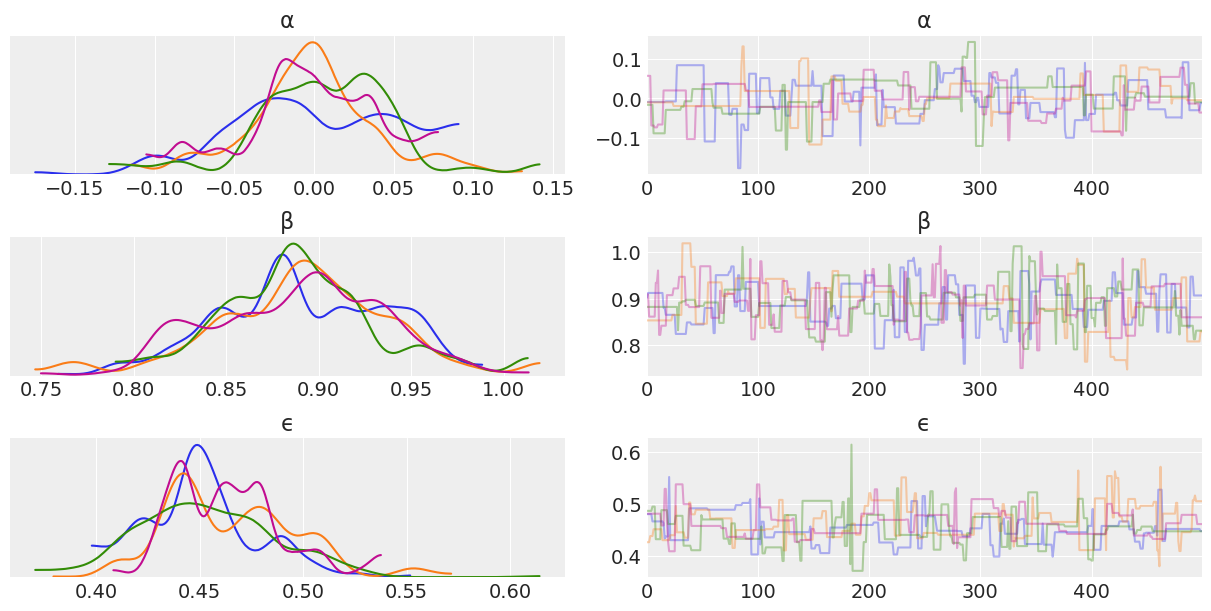

In [19]:
az.plot_trace(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa366ffd828>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa366ffd828>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa366ffd828>,
       dtype=object)]

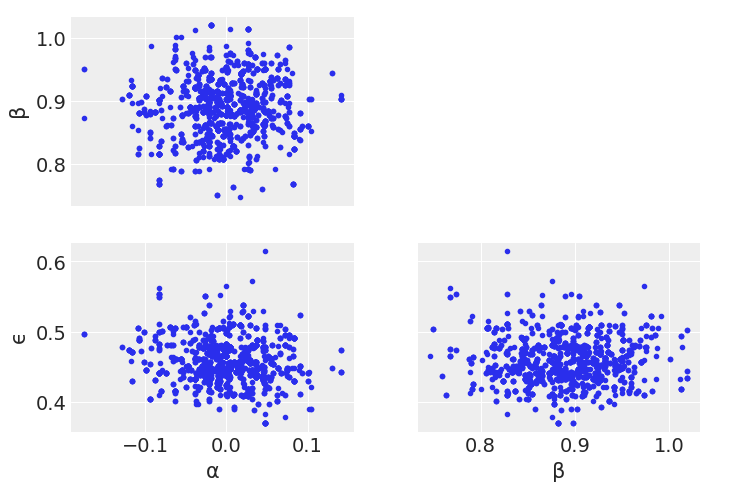

In [20]:
az.plot_pair(trace_mh_centered, var_names=['α', 'β', 'ϵ'])

Looking through the plots there's a couple things to note

Metropolis Hastings is less effective at sampling than NUTS. This is indicated by
 1. The Metropolis Hasting trace plots looking "square" when compared the NUTS traceplot. This is due to the sampler getting "stuck" at a value.
 2. The kernel density estimates of each chain have "squiggly" topologies
 3. The effective number of samples for Non Centered Metropolis Hastings is 1
 
One thing to note though is that Metropolis Hastings does sample faster than NUTS. While the the results aren't great credit is due where its deserved!
 
Diving into the problem further, we can see that $\alpha$ and $\beta$ are linearly correlated. Metropolis Hastings does not sample well when toplogies have such shapes. We'll talk more about this in Chapter 8, but for now note how centering x helps somewhat with the Metropolis Hasting sampler, as centering decorrelates $\alpha$ and $\beta$ parameters.

The biggest takeaway is the effectiveness of NUTS, regardless of topology in these two cases. This is not to say NUTS can handle anything you throw at it, there are some topologies that are hard, but by and large NUTS does quite well in many situations.

# Question 7
***

Let's import the dataset and create a mask for people older than the age of 18

In [21]:
howell = pd.read_csv("../code/data/howell.csv", delimiter=";")
howell.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [22]:
age_18_mask = howell["age"] > 18

A good first step is before diving into statistics is to look at the data and ask if it make sense. In my experience taller people tend to weigh more than shorter people. Let's check the data to be sure.

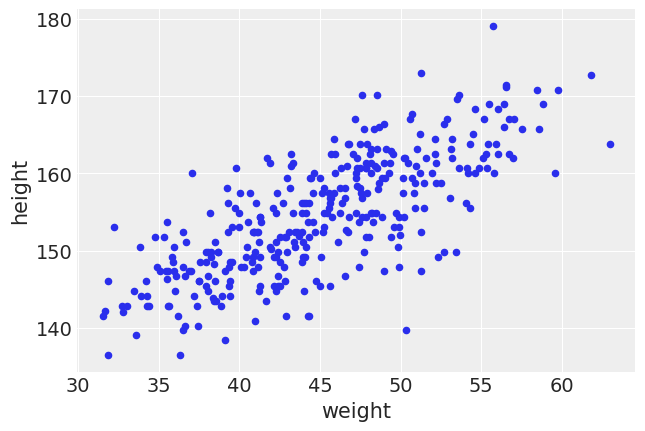

In [23]:
howell[age_18_mask].plot(kind="scatter", x="weight", y="height")

When looking at the plot above this is consistent our expectations. As weight increases, height increases as well. From visual inspection it looks like a linear fit with some noise is best. In this case we will assume constant variance. Let's create a model

In [24]:
height = howell["height"]
weight = howell["weight"]

In [25]:
with pm.Model() as over_18_heights:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10)
    ϵ = pm.HalfNormal("ϵ", sd=10)
    
    weight_shared = shared(weight[age_18_mask].values * 1.)
    μ = pm.Deterministic("μ", α+β*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=μ, sd=ϵ, observed = height[age_18_mask])
    trace_over_18_heights = pm.sample(tune=2000)
    ppc_over_18_heights = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
100%|██████████| 2000/2000 [00:00<00:00, 2819.33it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa363ef9080>,
      dtype=object)

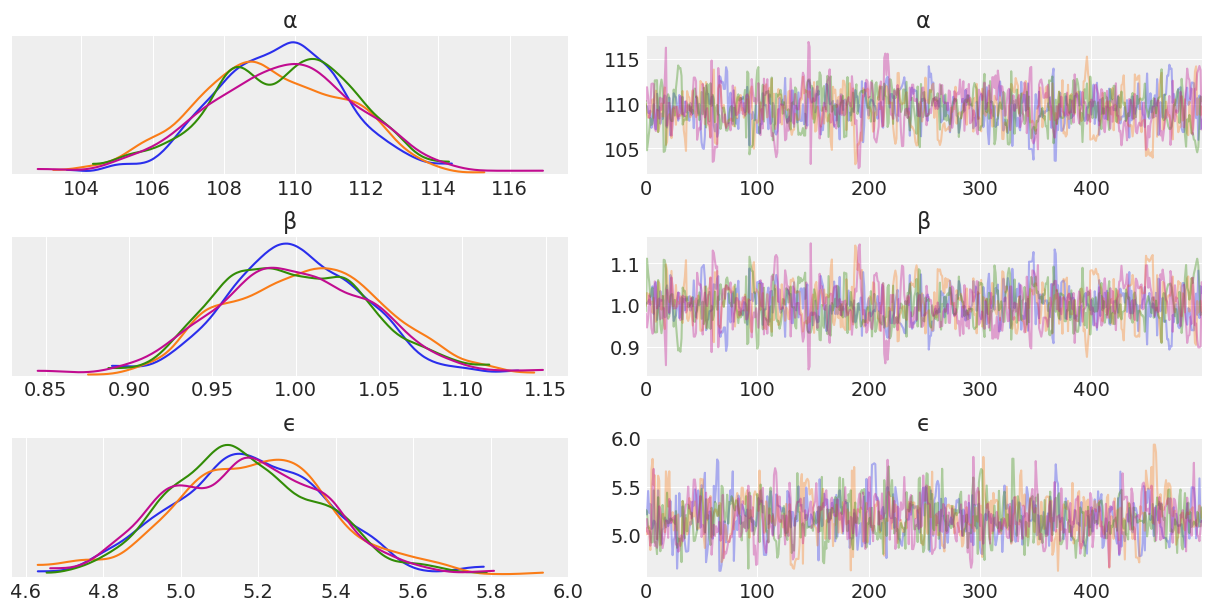

In [26]:
az.plot_trace(trace_over_18_heights, var_names = ["α","β", "ϵ"])

Looking at the traceplot it looks like the inference engine was able to explore the posterior adequately. Let's plot the regression and the hpd.

Text(0.5, 0.98, 'Weight vs Height fit and posterior predictive checks')

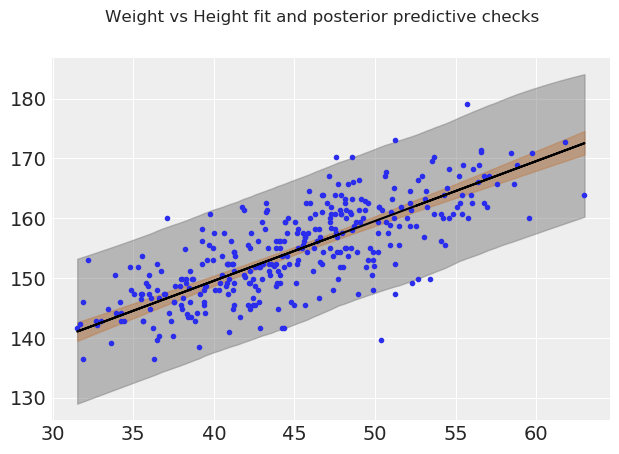

In [29]:
fig, ax = plt.subplots()

ax.plot(weight[age_18_mask], height[age_18_mask], "C0.")
μ_m = trace_over_18_heights["μ"].mean(0)
ϵ_m = trace_over_18_heights["ϵ"].mean()

ax.plot(weight[age_18_mask], μ_m, c="k")
az.plot_hpd(weight[age_18_mask], trace_over_18_heights["μ"], credible_interval=.98)
az.plot_hpd(weight[age_18_mask], ppc_over_18_heights["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks")

From visual inspection the average parameters of the fit look quite good, and the 98% interval of the posterior predictive check covers most of the distribution. Overall it looks like a linear fit is great for height vs weight for people over 18.

# Question 8
***

## Question Why [:0] for ppc values versus using all of them
Get question answered about first value versus all values in ppc

Using our previous fit we can generate datapoints for the height of people for various weights

In [30]:
weights = (45.73, 65.8, 54.2, 32.59)

In [32]:
weight_shared.set_value([45.73])
ppc = pm.sample_posterior_predictive(trace_over_18_heights, samples=2000, model=over_18_heights)

100%|██████████| 2000/2000 [00:00<00:00, 2902.71it/s]


## Example
In the book the first column is taken for the hpd check. Why take the [:,0] of the ppc and not take all samples? 

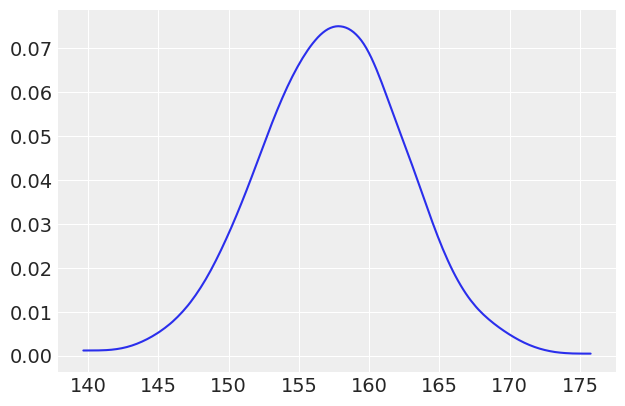

In [33]:
ppc_first_col = ppc["height_pred"][:,0]
az.plot_kde(ppc_first_col)

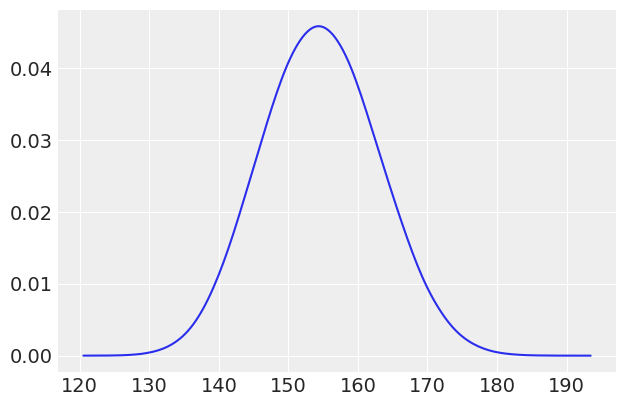

In [34]:
ppc_flattened = ppc["height_pred"].flatten()
az.plot_kde(ppc_flattened)

# Question 8
***

Let's take a look at the data again with out the age limits

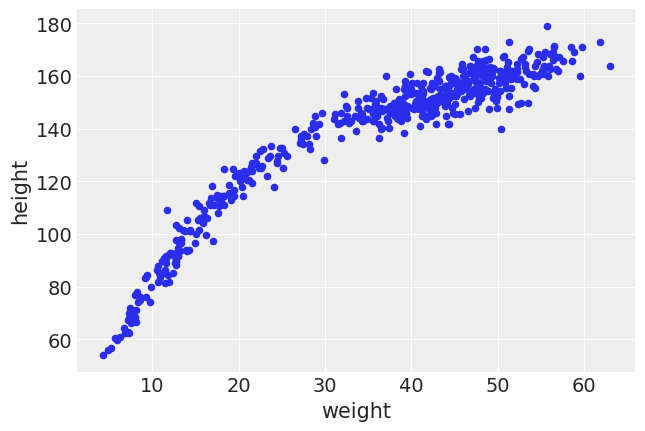

In [35]:
howell.plot(kind="scatter", x="weight", y="height")

By removing the age limit we notice a different trend. At lower weights, a single unit of weight generally corresponds to more height. At higher weights however the height still goes up, but by a lesser amount. There also seems to be more "spread" in the higher weights, than in the lower weights.

Intuitively again this makes sense. Weight is a proxy for age, and when born the variability in height and weight is smaller than for adults. Additionally children tend to grow in both height and weight. Unfortunately once humans reach adulthood, the height is mostly fixed, and the weight unfortunately changes all too easily.

Another thing to note is the shape of the distribution, it no longer looks linear throughout, but instead looks more like a curve. We could use a square root linear fit like earlier in the chapter but we instead will use a logarithmic fit. We will also model the noise term to be correlated with weight

In [44]:
with pm.Model() as heights:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10)
    γ = pm.HalfNormal("γ", sd=10)
    δ = pm.HalfNormal("δ", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    μ = pm.Deterministic("μ", α+β*tensor.log(weight_shared))
    ϵ = pm.Deterministic("ϵ", γ+δ*weight_shared)
    
    height_pred = pm.Normal("height_pred", mu=μ, sd=ϵ, observed = height)
    trace_heights = pm.sample(tune=2000)
    ppc_heights = pm.sample_posterior_predictive(trace_heights, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [δ, γ, β, α]
100%|██████████| 2000/2000 [00:00<00:00, 2305.11it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35ff7ef28>,
      dtype=object)

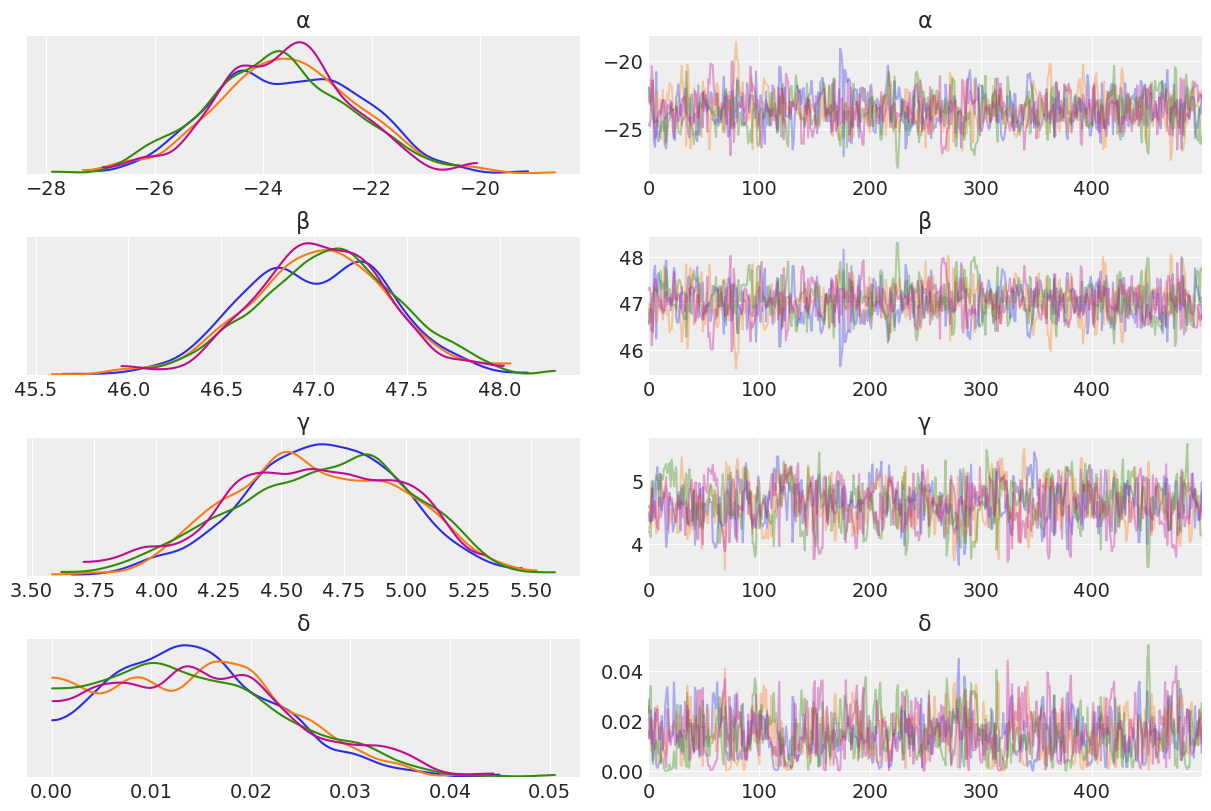

In [45]:
az.plot_trace(trace_heights, var_names = ["α","β", "γ", "δ"])

Text(0.5, 0.98, 'Weight vs Height fit and posterior predictive checks')

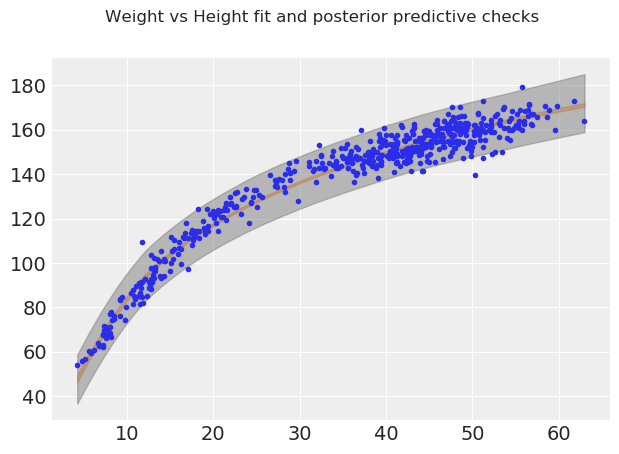

In [70]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
μ_m = trace_heights["μ"].mean(0)
ϵ_m = trace_heights["ϵ"].mean(0)

# ax.plot(weight, μ_m, c="k")
az.plot_hpd(weight, trace_heights["μ"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks")

## Question: Why does the logarithmic mean plot look so bad?
The height and weight should match up but something looks off? Why is it that the log fit needs to be sorted whereas the linear fit did not?

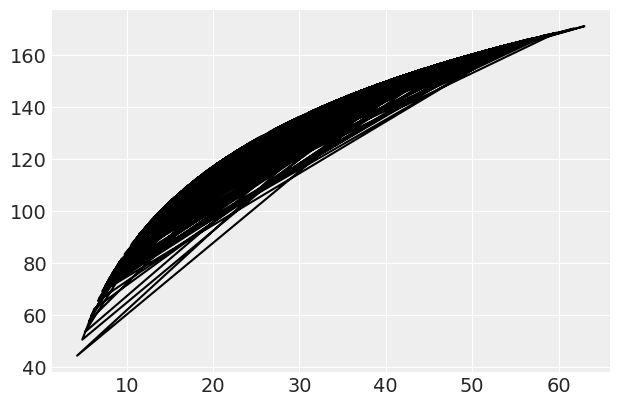

In [85]:
plt.plot(weight, μ_m, c="k")

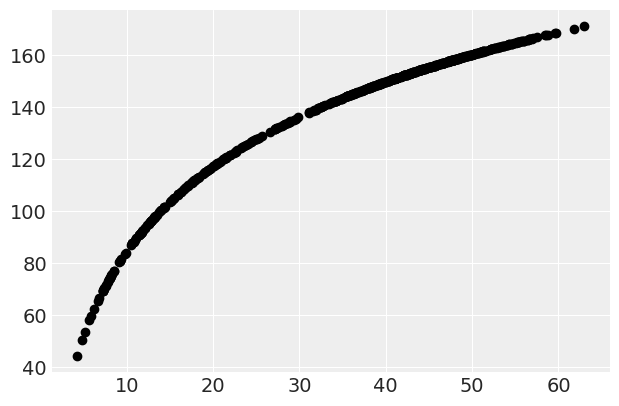

In [84]:
plt.scatter(weight, μ_m, c="k")

Let's also plot noise as a function of weight

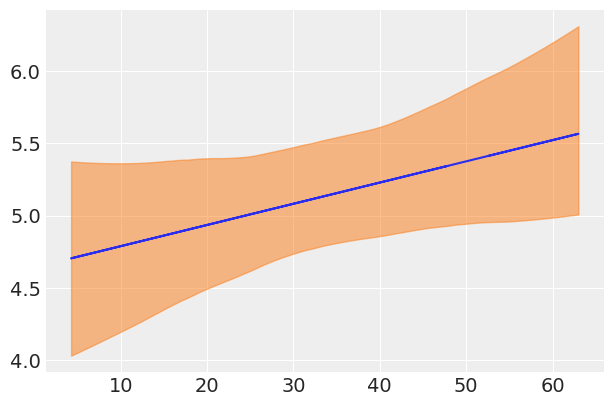

In [81]:
fig, ax = plt.subplots()
ax.plot(weight, trace_heights["ϵ"].mean(0))
az.plot_hpd(weight, trace_heights["ϵ"], credible_interval=.98)

It can be seen that in lower weight ranges there tends to be less variability in weight relative to height, versus when older in life. This makes sense with intuition as humans start out roughly the same in their earlier years, and tend to become more different in physical dimensions as they grow older in age and weight

# Question 10
***

Let's fit the model one more time but with a 2nd order polynomial that follows this definition
$$\mu = \alpha + \beta_0*x + \beta_1*x^2$$

Note that we could have used the dot product like the model_mlr example, but in this model we chose to explicitly split out the terms

In [88]:
with pm.Model() as heights_polynomial:
    α = pm.Normal("α", sd=10)
    β = pm.Normal("β", sd=10, shape=2)
    γ = pm.HalfNormal("γ", sd=10)
    δ = pm.HalfNormal("δ", sd=10)
    
    weight_shared = shared(weight.values * 1.)
    
    μ = pm.Deterministic("μ", α+β[0]*weight_shared + β[1]*weight_shared**2)
    ϵ = pm.Deterministic("ϵ", γ+δ*weight_shared)
    
    height_pred_polynomial = pm.Normal("height_pred", mu=μ, sd=ϵ, observed = height)
    trace_heights_polynomial = pm.sample(tune=2000)
    ppc_heights_polynomial = pm.sample_posterior_predictive(trace_heights_polynomial, samples=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [δ, γ, β, α]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:15<00:00, 628.79draws/s]
The acceptance probability does not match the target. It is 0.6377974870847016, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 2000/2000 [00:00<00:00, 2336.10it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa35c408208>,
      dtype=object)

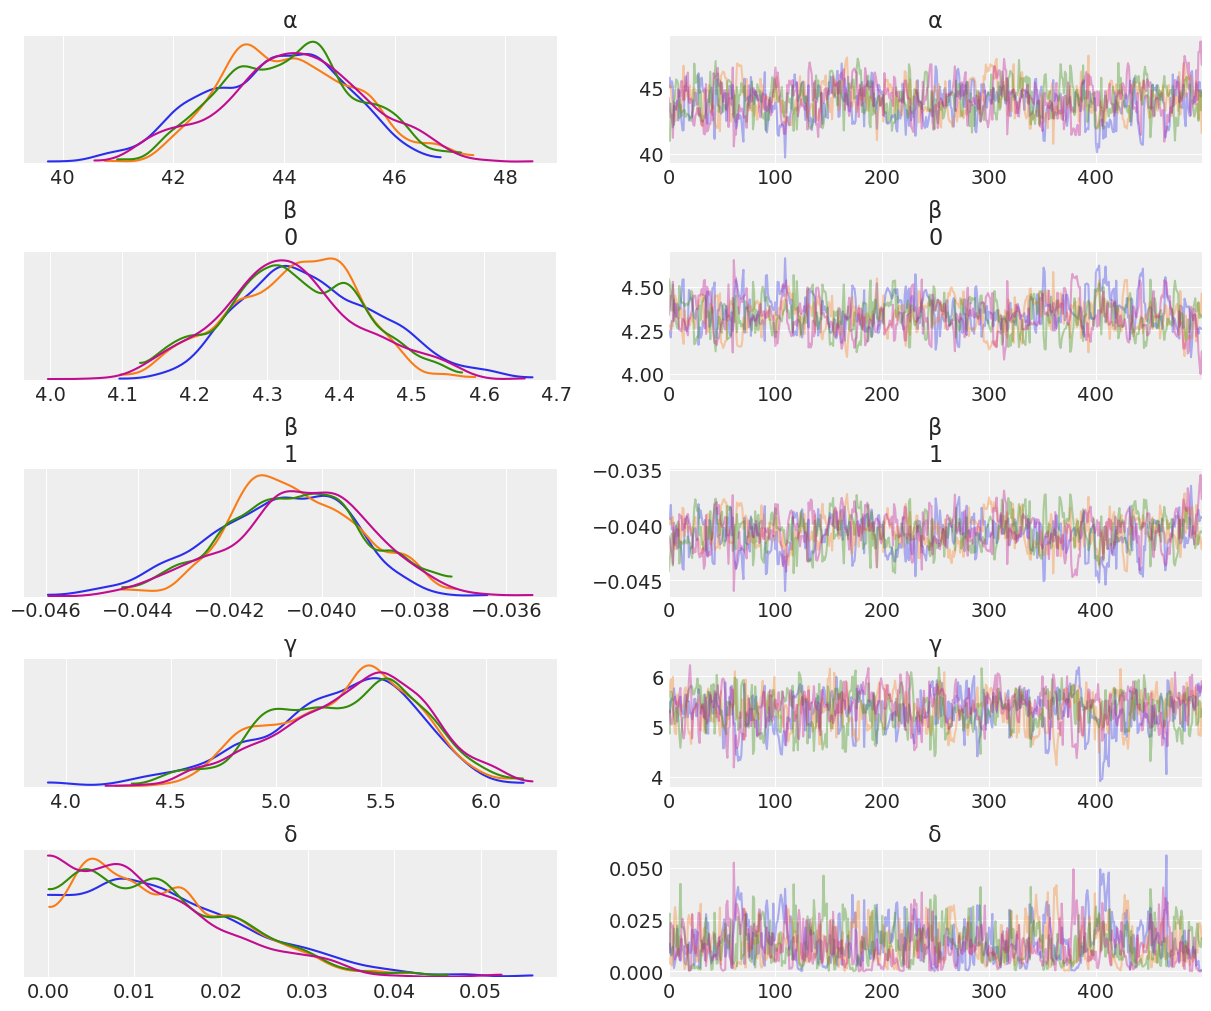

In [89]:
az.plot_trace(trace_heights_polynomial, var_names = ["α","β", "γ", "δ"])

Text(0.5, 0.98, 'Weight vs Height fit and posterior predictive checks')

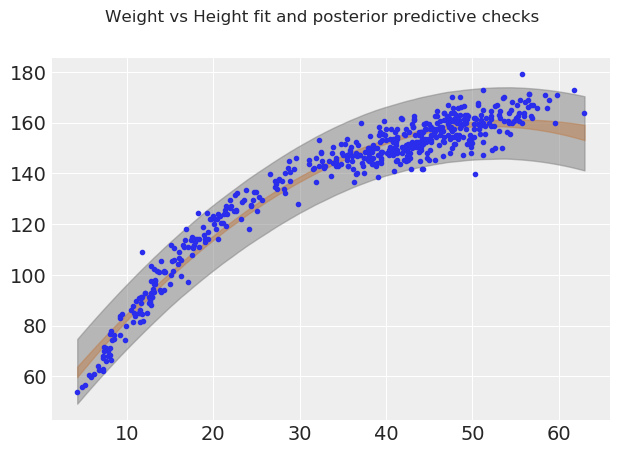

In [90]:
fig, ax = plt.subplots()

ax.plot(weight, height, "C0.")
μ_m = trace_heights_polynomial["μ"].mean(0)
ϵ_m = trace_heights_polynomial["ϵ"].mean(0)

# ax.plot(weight, μ_m, c="k")
az.plot_hpd(weight, trace_heights_polynomial["μ"], credible_interval=.98)
az.plot_hpd(weight, ppc_heights_polynomial["height_pred"], credible_interval=.98, color="gray")
fig.suptitle("Weight vs Height fit and posterior predictive checks")

For weights up until around ~50 units the polynomial fit looks good. However past that point the curve starts dropping dropping. Inuitively this does not make sense, that as people weigh more their height increases, until a certain point it starts dropping again. This phenonema is not a property of our data, but of our model choice. Polynomial functions always have to make N-1 turns, where N is the degree of the polynomial. This doesn't necessarily make our model useless, it seems to do a good job in certain parts of the domain, but as a statistical modeler its up to you to understand the tools in your toolbox and the tradeoffs of each.